# 数据可视化的意义
在机器学习（ML）的全生命周期（数据准备、模型构建、训练优化、结果解释、部署监控）中，数据可视化并非单纯的 “图表展示”，而是连接 “原始数据” 与 “模型逻辑”、“技术结果” 与 “业务决策” 的核心桥梁。其意义可从数据理解、模型优化、结果解释、风险控制、协作沟通五大核心场景展开






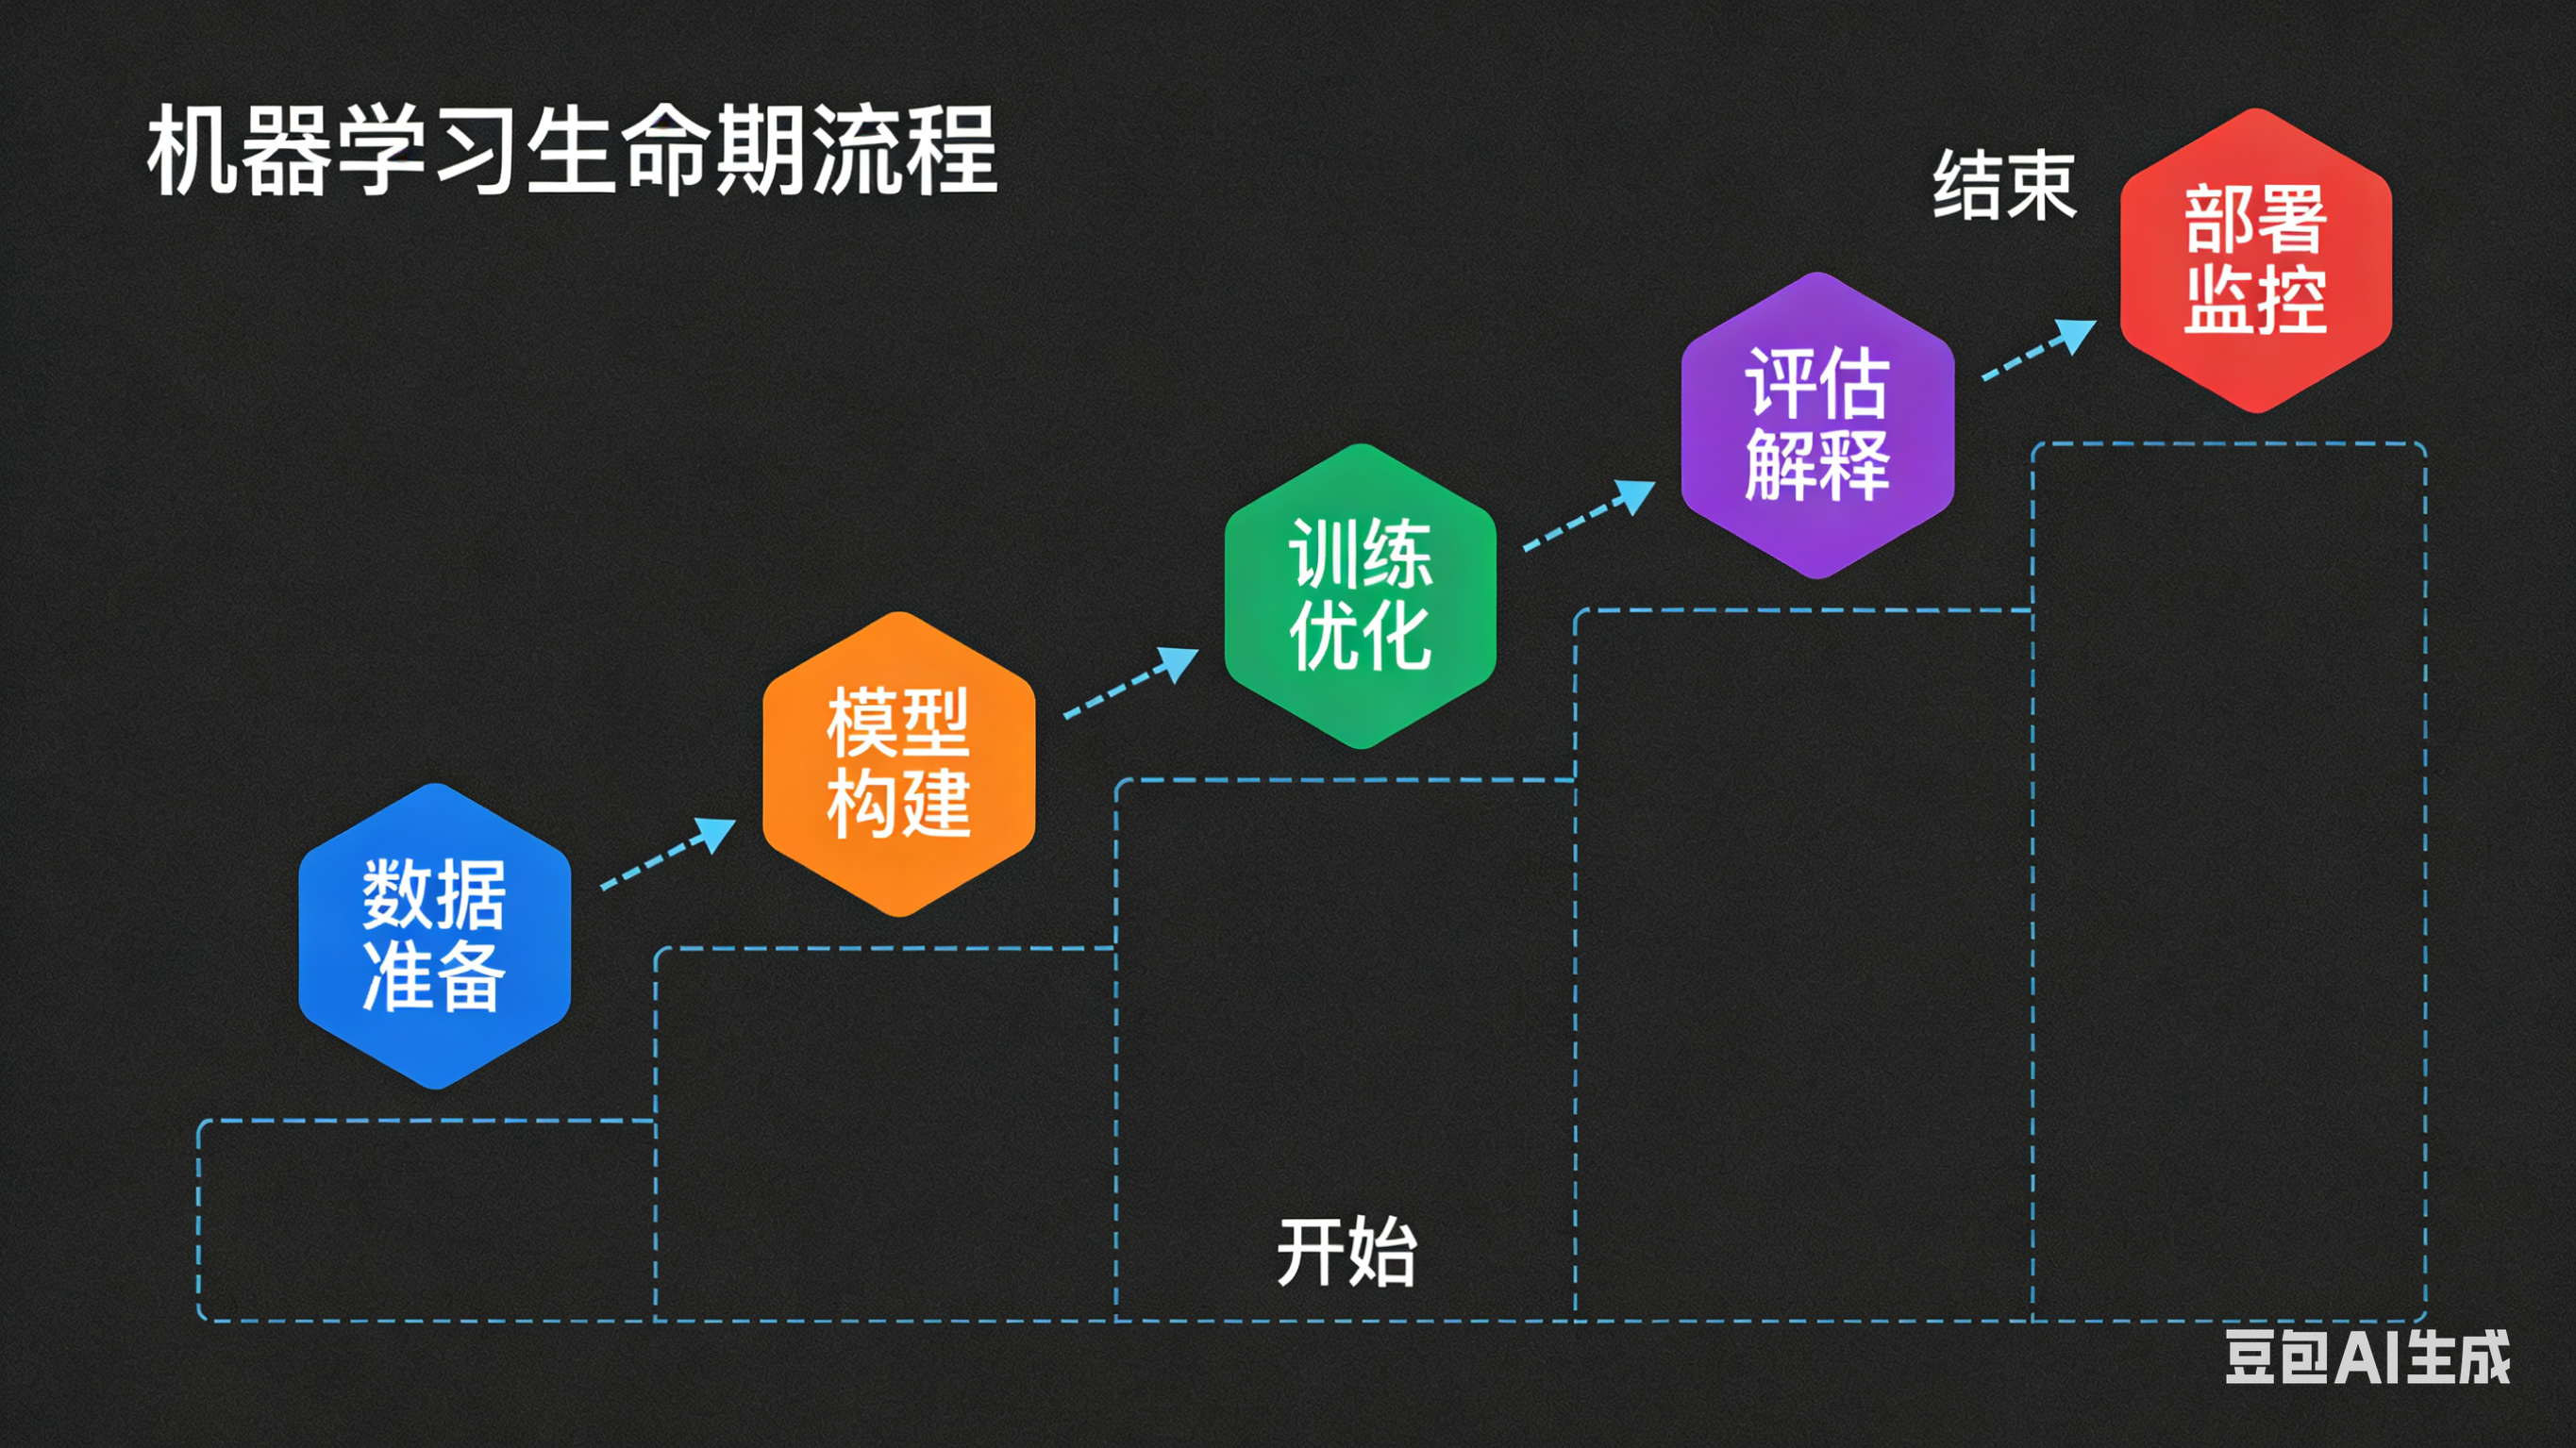

In [28]:
# 插入图片示例
# 在 Jupyter Notebook 中插入本地图像，可以使用如下方式：
from IPython.display import Image, display
display(Image(filename='./数据可视化在机器学习中的意义.png')) # 请确保 'insert_demo.png' 图片文件与 notebook 位于同一目录


# macOS 正确的苹方字体名称（二选一）
plt.rcParams['font.sans-serif'] = ['Songti SC']  # 完整名称
# 或用系统通用黑体（更稳定）
# plt.rcParams['font.sans-serif'] = ['Heiti SC']  # 黑体-简

plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


## 数据准备阶段：从 “混沌数据” 到 “结构化认知”，
### 一、 机器学习的效果高度依赖 “数据质量”，而可视化是发现数据隐藏问题、建立数据直觉的最直观工具 —— 它能将抽象的数值 / 文本转化为可感知的模式，避免模型 “带病训练”。
#### 1. 探索数据分布，定位异常通过直方图、核密度图（KDE）、箱线图等，可快速识别数据的统计特征：
例如，用直方图观察 “用户年龄” 字段，若发现存在 “年龄 = 200 岁” 的极端值，或分布呈现明显 “双峰”（可能对应 “青少年用户” 和 “中老年用户” 两类群体），能直接指导后续的数据清洗（剔除异常值）或特征工程（按分布拆分特征）。
用箱线图分析 “商品销量”，可快速定位超出四分位距（IQR）的 “异常高销量”（可能是促销活动导致，需判断是否保留或单独标记）

#### 2.发现特征关联，减少冗余通过散点图、热力图等，可揭示特征间的潜在关系：
用散点图观察 “广告投放金额” 与 “产品转化率” 的关系，若呈现明显的 “线性正相关”，说明该特征对模型预测有价值；若完全离散（无相关性），则需考虑是否剔除该特征以降低模型复杂度。
用相关性热力图分析多个特征（如 “用户时长”“点击次数”“留存率”），若发现 “点击次数” 与 “用户时长” 的相关系数 > 0.9（强相关），可通过 “特征降维”（如 PCA）合并冗余特征，避免模型过拟合。

#### 3.识别数据偏见，保障公平性可视化能直观暴露数据集中的 “偏见”（如样本不平衡、群体歧视），而这类问题会直接导致模型公平性缺陷：
例如，在 “贷款违约预测” 任务中，用饼图观察 “性别” 标签分布，若 “女性样本” 仅占 5%，模型可能更偏向学习 “男性用户” 的特征，导致对女性用户的预测准确率偏低。
在 “图像分类” 任务中，用网格图展示训练集样本，若 “猫的图片” 多为 “橘猫”，模型可能对 “黑猫”“布偶猫” 的识别效果差（类别分布不均衡）。

### 二、模型构建与训练阶段：实时监控训练过程，精准优化方向

2.1 监控训练指标，判断训练状态

2.2 可视化模型结构，降低复杂度

三、模型评估与解释阶段：从 “黑箱结果” 到 “可信任逻辑”，机器学习的落地（尤其是金融、医疗等强监管领域）需要 “模型可解释性”，可视化是让非技术人员（如业务方、监管机构）理解模型决策逻辑的关键。
1. 评估模型泛化能力，量化效果边界
评估模型泛化能力，量化效果边界通过混淆矩阵、ROC 曲线、PR 曲线等，可精准衡量模型在 “unseen data” 上的表现：
在 “疾病诊断” 任务中，混淆矩阵能清晰展示 “真阳性（TP，正确诊断患病）”“假阳性（FP，健康误诊患病）”“假阴性（FN，患病误诊健康）” 的数量 —— 若 FN 比例过高，需调整模型阈值（降低 “漏诊” 风险）。
在 “欺诈检测” 任务中，PR 曲线（精确率 - 召回率曲线） 比 ROC 曲线更适合 “样本不平衡” 场景：若曲线下面积（AUC）低，说明模型对 “欺诈样本” 的识别能力弱，需进一步优化特征（如增加 “异常交易时间”“异地登录” 等关键特征）。
2. 解释模型决策，提升信任度对于复杂模型（如随机森林、GPT 类大模型），可视化工具能 “拆解” 决策过程：
用决策树可视化展示 “客户流失预测” 模型：可清晰看到 “月消费 > 500 元” 且 “客服投诉次数≥2 次” 的客户，流失概率高达 80%—— 业务方可基于此制定 “高价值客户专属客服” 策略。
用SHAP 值可视化（蜜蜂图、Summary Plot） 解释 “贷款审批” 模型：若某客户被拒绝，图中可标注 “信用评分（SHAP 值 =-0.8，负向影响最大）”“负债比例（SHAP 值 =-0.5）” 是核心原因，监管机构可验证决策是否合规。

# 工具实战篇

In [2]:
import matplotlib
import seaborn

Matplotlib 是 Python 中最流行的数据可视化库之一，用于创建高质量的图表、图形和可视化效果。它提供了类似 MATLAB 的绘图接口，支持交互式绘图，并能生成各种格式的出版质量图形。
核心特点
    高度灵活：支持自定义几乎所有图表元素（如标签、颜色、字体、线条样式等）。
    多种绘图类型：包括折线图、散点图、柱状图、饼图、直方图、箱线图等。
    多平台兼容：可在 Jupyter Notebook、脚本、GUI 应用程序中使用。
    多格式输出：支持保存为 PNG、JPEG、SVG、PDF 等多种格式。
    扩展性：可与 NumPy、Pandas 等数据处理库无缝集成。

基本概念
    Figure：整个绘图窗口或页面，是最顶层的容器。
    Axes：实际的绘图区域（一个 Figure 可包含多个 Axes）。
    Axis：坐标轴（x 轴、y 轴），控制刻度和范围。
    Artist：所有可见元素（如线条、文本、点等）。

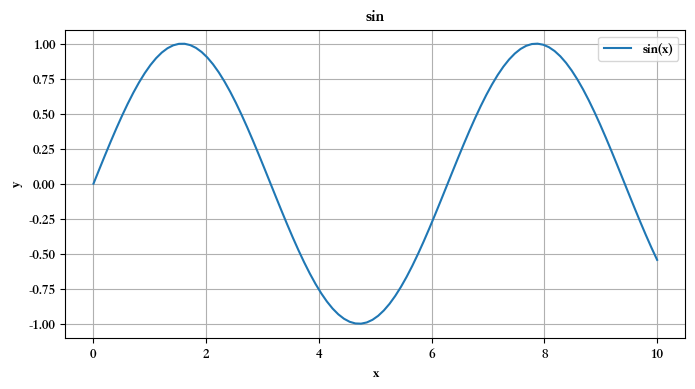

In [13]:
import matplotlib.pyplot as plt
import numpy as np  # 通常与 NumPy 一起使用
# 生成数据
x = np.linspace(0, 10, 100)  # 0 到 10 之间的 100 个点
y = np.sin(x)

# 创建图表
plt.figure(figsize=(8, 4))  # 设置图表大小
plt.plot(x, y, label='sin(x)')  # 绘制折线图
plt.title('sin')  # 添加标题
plt.xlabel('x')  # 添加 x 轴标签
plt.ylabel('y')  # 添加 y 轴标签
plt.grid(True)  # 显示网格线
plt.legend()  # 显示图例
plt.show()  # 显示图表


# 折线图

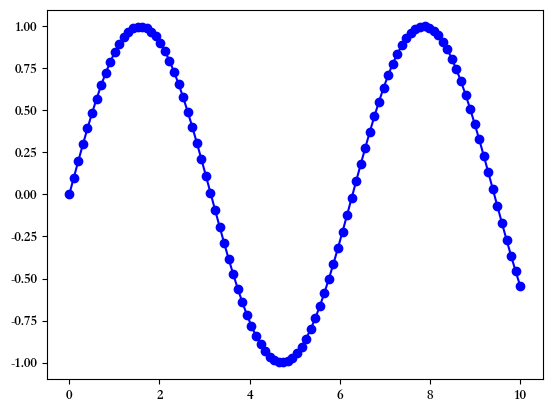

In [14]:

#折线图（Line Plot）
plt.plot(x, y, color='blue', linestyle='-', marker='o')


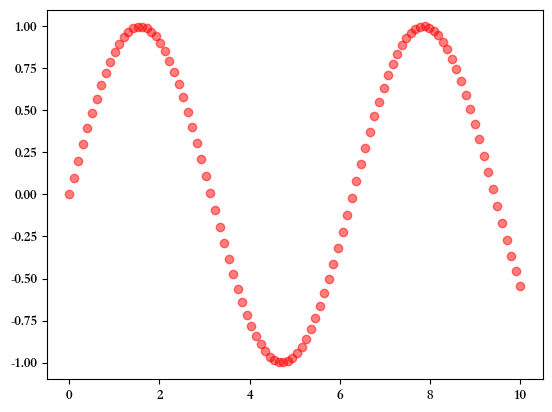

In [15]:
#散点图（Scatter Plot）
plt.scatter(x, y, color='red', alpha=0.5)


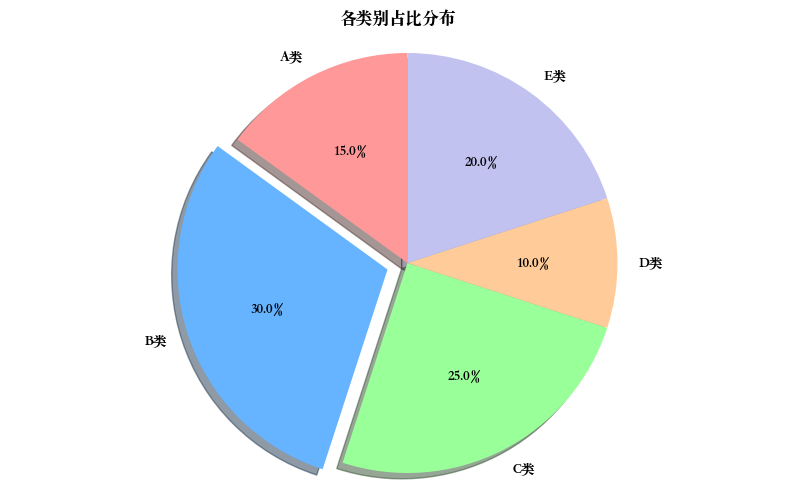

In [16]:
#饼图
import matplotlib.pyplot as plt

# 数据
labels = ['A类', 'B类', 'C类', 'D类', 'E类']
sizes = [15, 30, 25, 10, 20]
explode = (0, 0.1, 0, 0, 0)  # 突出显示B类

# 创建饼图
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.axis('equal')  # 使饼图为正圆形
plt.title('各类别占比分布')
plt.show()

<BarContainer object of 4 artists>

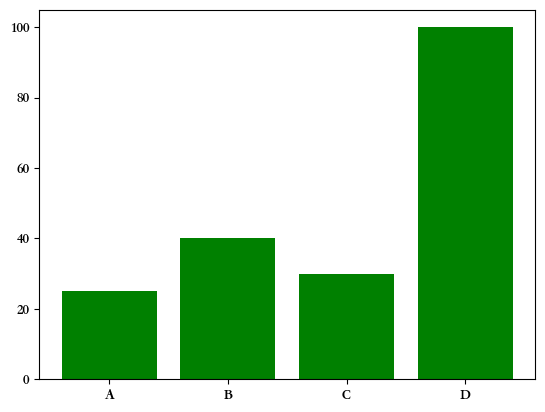

In [23]:
# 柱状图
categories = ['A', 'B', 'C', 'D']
values = [25, 40, 30, 100]
plt.bar(categories, values, color='green')

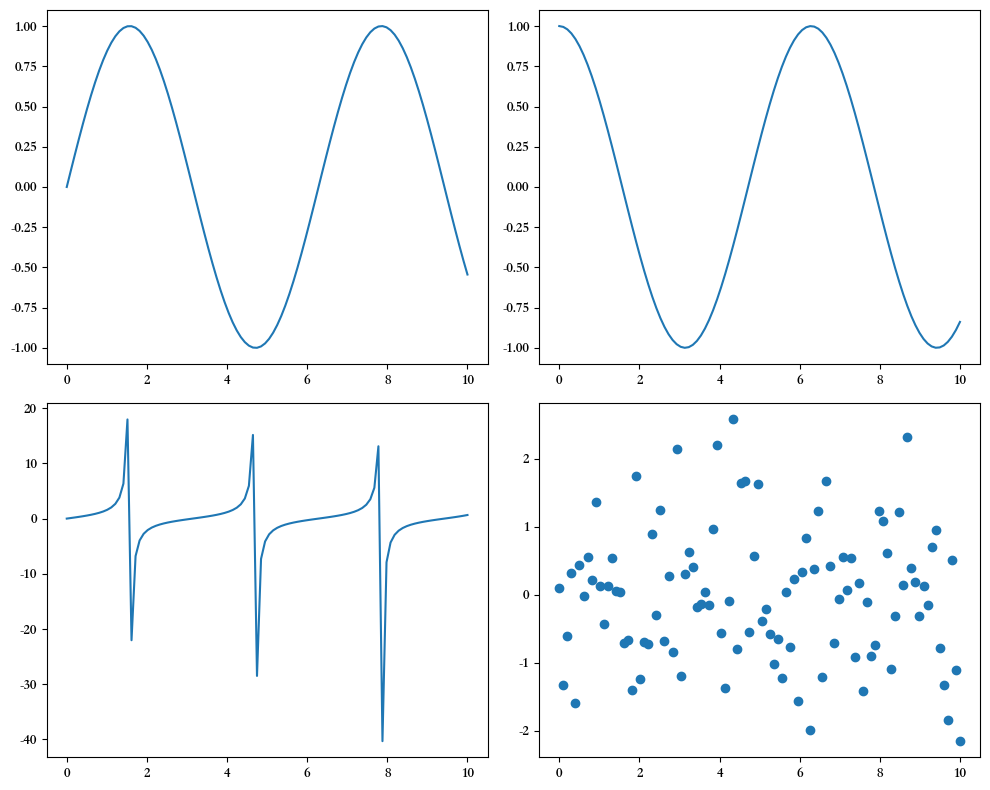

In [21]:
#多子图（Subplots）
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 网格
axes[0, 0].plot(x, np.sin(x))
axes[0, 1].plot(x, np.cos(x))
axes[1, 0].plot(x, np.tan(x))
axes[1, 1].scatter(x, np.random.randn(len(x)))
plt.tight_layout()  # 自动调整布局

seaborn
是基于 matplotlib 的高级统计可视化库，提供了更简洁的 API。
专注于统计图表（如分布、关系、分类等），默认风格更现代、美观。
适合快速生成统计分析图表，尤其擅长处理 Pandas DataFrame。
也就是更适合 pandas


## 一、数据准备阶段：数据分布与异常值分析
1. 直方图 + 核密度图（KDE）：分析特征分布

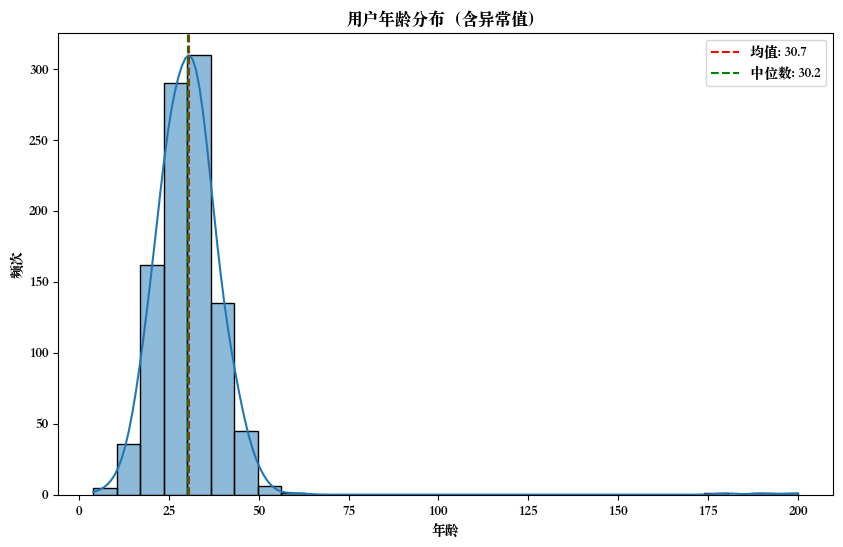

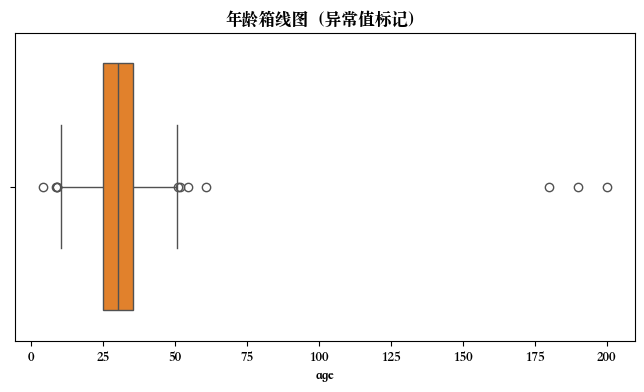

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 模拟用户年龄数据（含异常值）
np.random.seed(42)
age_data = np.concatenate([
    np.random.normal(30, 8, 990),  # 正常年龄分布（均值30，标准差8）
    np.array([200, 180, 190])      # 异常值
])
df = pd.DataFrame({"age": age_data})

# 绘图
plt.figure(figsize=(10, 6))
sns.histplot(df["age"], kde=True, bins=30, color="#1f77b4", edgecolor="black")
plt.axvline(df["age"].mean(), color="red", linestyle="--", label=f"均值: {df['age'].mean():.1f}")
plt.axvline(df["age"].median(), color="green", linestyle="--", label=f"中位数: {df['age'].median():.1f}")
plt.title("用户年龄分布（含异常值）", fontsize=12)
plt.xlabel("年龄")
plt.ylabel("频次")
plt.legend()
plt.show()

# 输出异常值（箱线图辅助识别）
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["age"], color="#ff7f0e")
plt.title("年龄箱线图（异常值标记）")
plt.show()

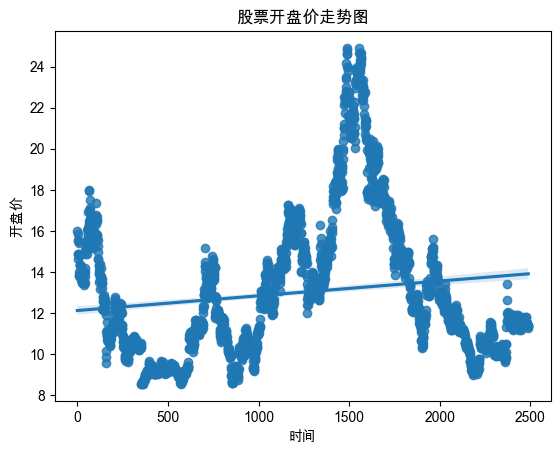

In [30]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

# windows
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = ['Arial Unicode MS', 'Heiti TC', 'PingFang HK', 'STHeiti', 'sans-serif']
#plt.rcParams['axes.unicode_minus'] = False
# 读取CSV文件
df = pd.read_csv('000001.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

#创建回归图
sns.regplot(x=df.index, y=df['open'], data=df)
plt.title('股票开盘价走势图')
plt.xlabel('时间')
plt.ylabel('开盘价')
plt.show()



     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: xlabel='total_bill', ylabel='tip'>

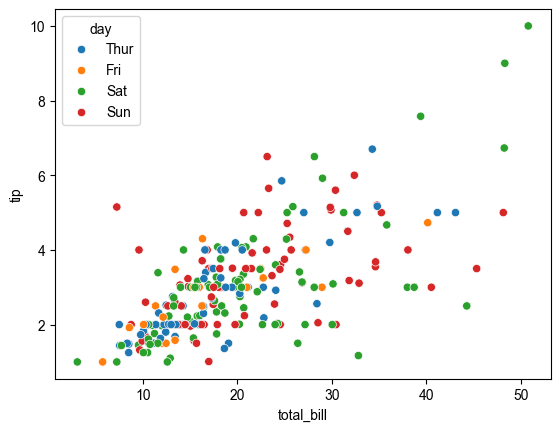

In [ ]:
#散点图
#数据集反映了餐饮消费中的常见变量，
import seaborn as sns
tips = sns.load_dataset('tips')
print(tips)
sns.scatterplot(x='total_bill', y='tip', hue='smoker', data=tips)


#### 2. 相关性热力图：特征冗余分析


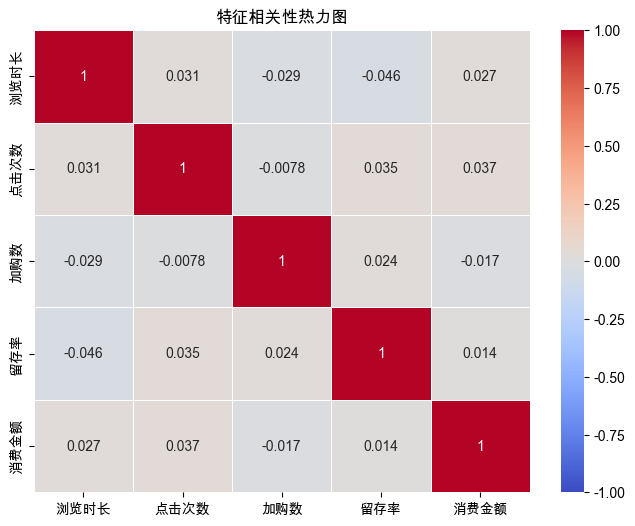

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 模拟电商用户特征数据
np.random.seed(42)
data = {
    "浏览时长": np.random.rand(1000) * 10,
    "点击次数": np.random.rand(1000) * 50 + 0.8 * np.random.rand(1000) * 10,  # 与浏览时长强相关
    "加购数": np.random.rand(1000) * 10,
    "留存率": np.random.rand(1000) * 1 + 0.3 * np.random.rand(1000) * 10,
    "消费金额": np.random.rand(1000) * 1000
}
df = pd.DataFrame(data)

# 计算相关系数
corr = df.corr()

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("特征相关性热力图", fontsize=12)
plt.show()

### 3. 类别分布饼图：样本不平衡分析


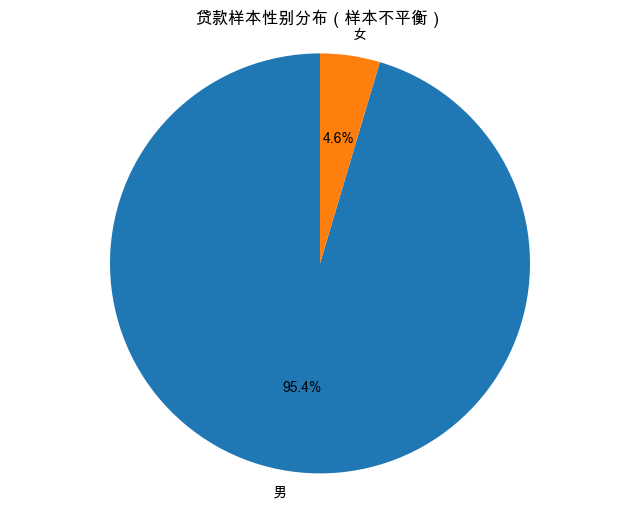

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 模拟贷款违约预测的性别分布（样本不平衡）
np.random.seed(42)
gender = np.random.choice(["男", "女"], size=1000, p=[0.95, 0.05])  # 女性仅占5%
df = pd.DataFrame({"gender": gender})

# 绘制饼图
plt.figure(figsize=(8, 6))
gender_count = df["gender"].value_counts()
sns.set_palette(["#1f77b4", "#ff7f0e"])
plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%", startangle=90)
plt.title("贷款样本性别分布（样本不平衡）")
plt.axis("equal")  # 保证饼图为正圆形
plt.show()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     5

/var/folders/7s/p20wf5f921z0gb6kl59f60gw0000gn/T/ipykernel_1663/2833646901.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='survived', data=titanic, ci=None)


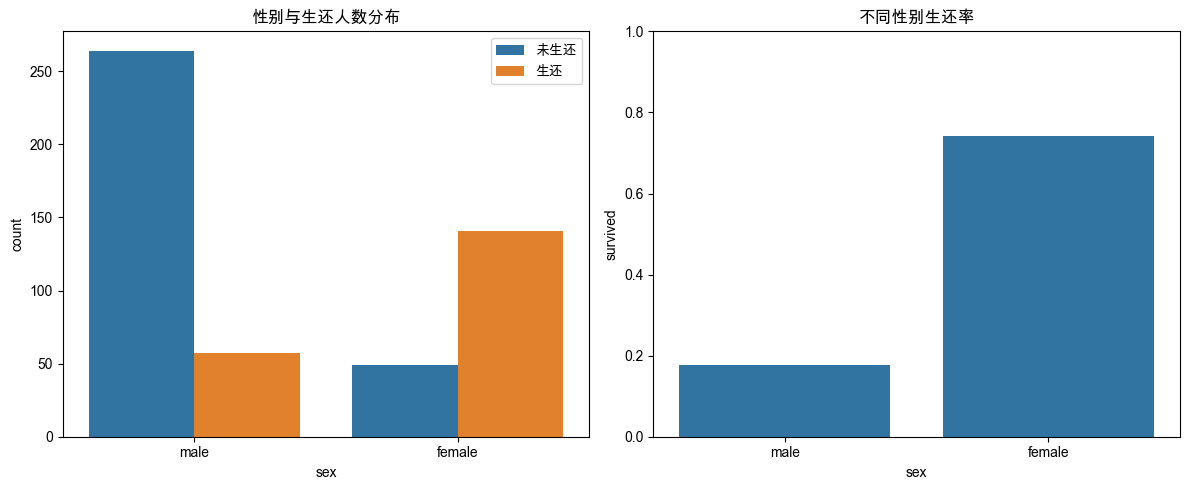

In [35]:
# 加载泰坦尼克号数据集
titanic = sns.load_dataset('titanic')

# 查看数据结构和基本统计信息
print(titanic.head())
print("\n数据基本信息：")
titanic.info()

# 查看存活情况分布
print("\n存活情况分布：")
print(titanic['survived'].value_counts())


# 绘制生还率与性别的关系
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('性别与生还人数分布')
plt.legend(['未生还', '生还'])

plt.subplot(1, 2, 2)
sns.barplot(x='sex', y='survived', data=titanic, ci=None)
plt.title('不同性别生还率')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

In [23]:
titanic = sns.load_dataset('titanic')
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
506         1       2  female  33.0      0      2  26.0000        S  Second   
507         1       1    male   NaN      0      0  26.5500        S   First   
508         0       3    male  28.0      0      0  22.5250        S   Third   
509         1       3    male  26.0      0      0  56.4958        S   Third   
510         1       3    male  29.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

/var/folders/7s/p20wf5f921z0gb6kl59f60gw0000gn/T/ipykernel_82072/1695200112.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='age', data=titanic, palette='Set2')


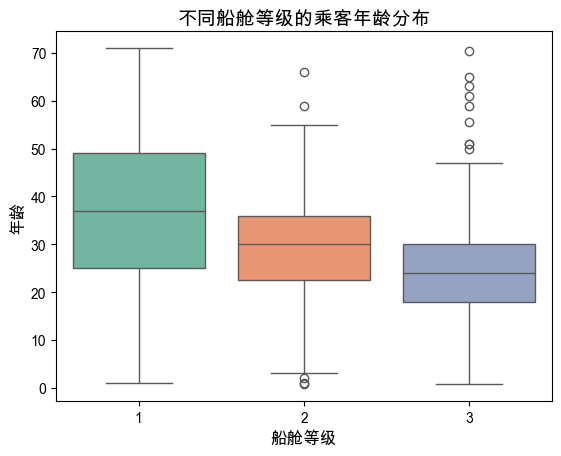

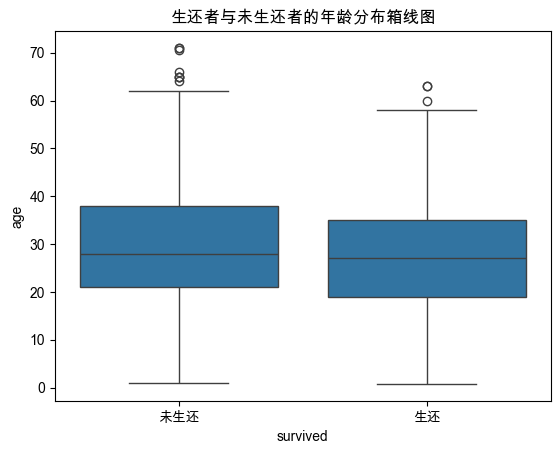

In [29]:
#Boxplot 通过五个关键统计量（最小值、第一四分位数、中位数、第三四分位数、最大值）直观地呈现数据的中心趋势、
# 离散程度和异常值，非常适合比较多组数据的分布差异。

# 散落在盒子和须之外的小点（或异常点）代表数据中的离群值（Outlier），即与整体数据分布差异较大的观测值
#年龄分布与生还情况
# 年龄分布（删除缺失值）
#箱线图是一种用统计量（中位数、四分位数、异常值等）展示数据分布的可视化工具，
# 能直观反映数据的中心趋势、离散程度、偏态和异常值。
# 1. 箱体（Box）
# 下四分位数（Q1，25% 分位数）：箱体底部横线，代表数据中 25% 的值小于等于它。
# 例：未生还者的 Q1 约为 20 岁，说明 25% 的未生还者年龄 ≤ 20 岁。
# 中位数（Q2，50% 分位数）：箱体中间横线，代表数据的中间值。
# 例：未生还者的中位数约为 30 岁，生还者的中位数约为 28 岁，说明生还者年龄整体略低于未生还者。
# 上四分位数（Q3，75% 分位数）：箱体顶部横线，代表数据中 75% 的值小于等于它。
# 例：未生还者的 Q3 约为 40 岁，说明 75% 的未生还者年龄 ≤ 40 岁。
titanic = sns.load_dataset('titanic')
sns.boxplot(x='pclass', y='age', data=titanic, palette='Set2')
plt.title('不同船舱等级的乘客年龄分布', fontsize=14)
plt.xlabel('船舱等级', fontsize=12)
plt.ylabel('年龄', fontsize=12)
plt.show()


titanic = sns.load_dataset('titanic')
sns.boxplot(x='survived', y='age', data=titanic)
plt.xticks([0, 1], ['未生还', '生还'])
plt.title('生还者与未生还者的年龄分布箱线图')
plt.show()
# 创建图表


不同仓位的生还率:
class
First     0.571429
Second    0.471698
Third     0.279720
Name: survived, dtype: float64


/var/folders/7s/p20wf5f921z0gb6kl59f60gw0000gn/T/ipykernel_1663/1139359273.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = titanic.groupby('class')['survived'].mean()
/var/folders/7s/p20wf5f921z0gb6kl59f60gw0000gn/T/ipykernel_1663/1139359273.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='class', y='survived', data=titanic, ci=None)


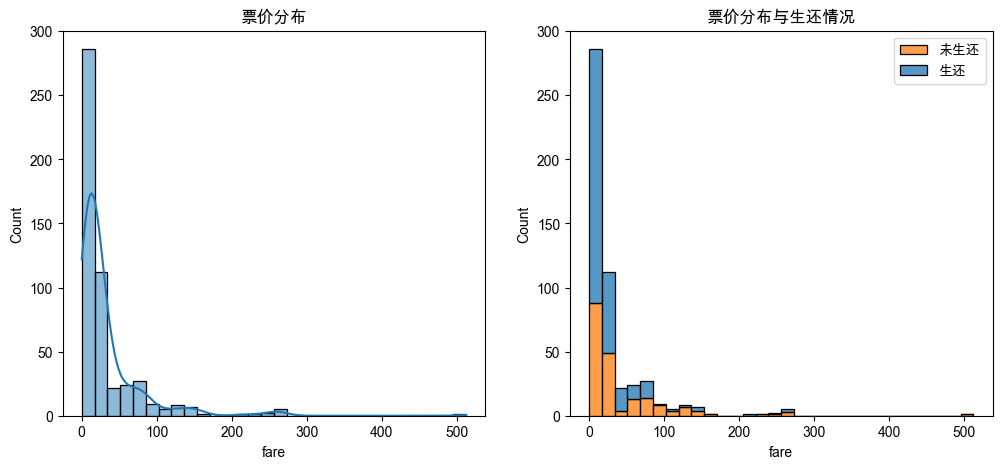

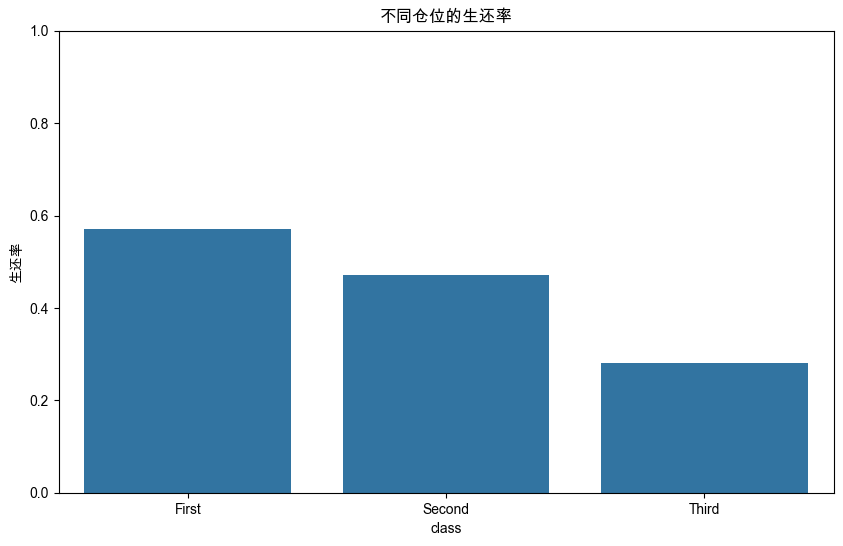

In [36]:
#票价分布与生还情况
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(titanic['fare'], kde=True, bins=30)
plt.title('票价分布')
plt.subplot(1, 2, 2)


sns.histplot(data=titanic, x='fare', hue='survived', multiple='stack', bins=30)
plt.title('票价分布与生还情况')
plt.legend(['未生还', '生还'])
# 计算不同仓位的生还率
survival_rate = titanic.groupby('class')['survived'].mean()
print("\n不同仓位的生还率:")
print(survival_rate)

# 可视化不同仓位的生还率
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='survived', data=titanic, ci=None)
plt.title('不同仓位的生还率')
plt.ylabel('生还率')
plt.ylim(0, 1)
plt.show()


## 二、模型训练阶段：将 “不可见的训练动态” 转化为 “可追踪的指标”，
### 2.1 监控训练指标，判断训练状态

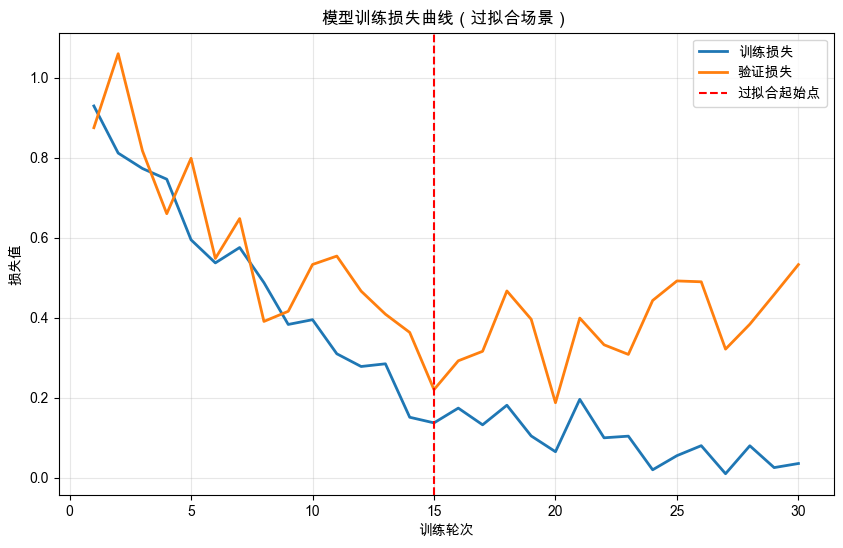

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 模拟训练/验证损失曲线（过拟合场景）
np.random.seed(42)
epochs = np.arange(1, 31)
train_loss = np.exp(-epochs/10) + 0.05 * np.random.randn(30)  # 训练损失持续下降
val_loss = np.exp(-epochs/15) + 0.1 * np.random.randn(30)     # 验证损失先降后升（过拟合）
val_loss[15:] += 0.02 * (epochs[15:] - 15)  # 15轮后验证损失上升

df_loss = pd.DataFrame({
    "epoch": epochs,
    "train_loss": train_loss,
    "val_loss": val_loss
})

# 绘制损失曲线
plt.figure(figsize=(10, 6))
sns.lineplot(x="epoch", y="train_loss", data=df_loss, label="训练损失", color="#1f77b4", linewidth=2)
sns.lineplot(x="epoch", y="val_loss", data=df_loss, label="验证损失", color="#ff7f0e", linewidth=2)
plt.axvline(x=15, color="red", linestyle="--", label="过拟合起始点")
plt.title("模型训练损失曲线（过拟合场景）", fontsize=12)
plt.xlabel("训练轮次")
plt.ylabel("损失值")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### 2.2 模型查看
对于深度学习模型（如 CNN、Transformer），通过 “网络结构图” 可直观展示层与层的连接关系， 方便我们进一步做模型优化


netron.app

## 三、模型评估阶段


### 3.1 实验结果分析，模型效果评估

通过混淆矩阵、ROC 曲线、PR 曲线等，可精准衡量模型在 “unseen data” 上的表现：
在 “疾病诊断” 任务中，混淆矩阵能清晰展示 “真阳性（TP，正确诊断患病）”“假阳性（FP，健康误诊患病）”“假阴性（FN，患病误诊健康）” 的数量 —— 若 FN 比例过高，需调整模型阈值（降低 “漏诊” 风险）。
在 “欺诈检测” 任务中，PR 曲线（精确率 - 召回率曲线） 比 ROC 曲线更适合 “样本不平衡” 场景：若曲线下面积（AUC）低，说明模型对 “欺诈样本” 的识别能力弱，需进一步优化特征（如增加 “异常交易时间”“异地登录” 等关键特征）。

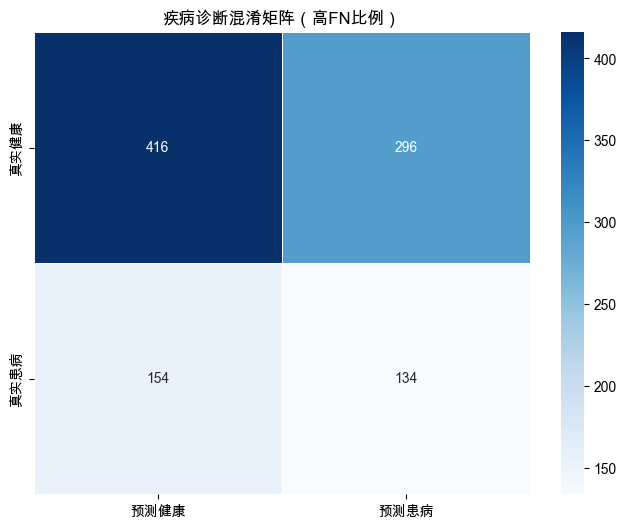

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 模拟疾病诊断的混淆矩阵数据
np.random.seed(42)
y_true = np.random.choice([0, 1], size=1000, p=[0.7, 0.3])  # 0=健康，1=患病
y_pred = np.random.choice([0, 1], size=1000, p=[0.6, 0.4])  # 模拟预测结果
# 手动调整：增加假阴性（FN）比例（漏诊）
y_pred[(y_true == 1) & (y_pred == 0)] = 0  # 患病误诊健康（FN）
y_pred[(y_true == 0) & (y_pred == 1)] = 1  # 健康误诊患病（FP）

# 计算混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=["真实健康", "真实患病"], columns=["预测健康", "预测患病"])

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title("疾病诊断混淆矩阵（高FN比例）", fontsize=12)
plt.show()

ROC/PR 曲线：模型泛化能力评估


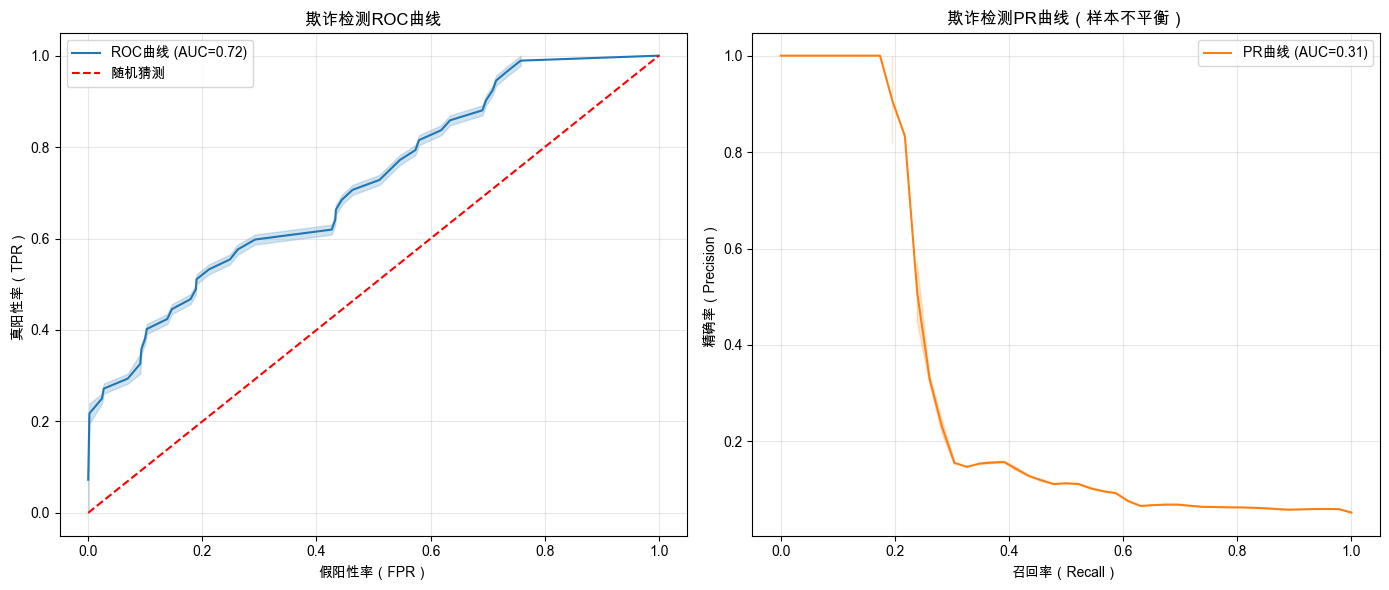

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# 模拟欺诈检测的预测概率和真实标签（样本不平衡）
np.random.seed(42)
y_true = np.random.choice([0, 1], size=1000, p=[0.95, 0.05])  # 0=正常，1=欺诈
y_score = np.random.rand(1000)  # 模拟模型预测概率
y_score[y_true == 1] += 0.2  # 欺诈样本预测概率略高

# 计算ROC曲线
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# 计算PR曲线
precision, recall, _ = precision_recall_curve(y_true, y_score)
pr_auc = auc(recall, precision)

# 绘制双图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ROC曲线
sns.lineplot(x=fpr, y=tpr, ax=ax1, color="#1f77b4", label=f"ROC曲线 (AUC={roc_auc:.2f})")
ax1.plot([0, 1], [0, 1], color="red", linestyle="--", label="随机猜测")
ax1.set_title("欺诈检测ROC曲线", fontsize=12)
ax1.set_xlabel("假阳性率（FPR）")
ax1.set_ylabel("真阳性率（TPR）")
ax1.legend()
ax1.grid(alpha=0.3)

# PR曲线
sns.lineplot(x=recall, y=precision, ax=ax2, color="#ff7f0e", label=f"PR曲线 (AUC={pr_auc:.2f})")
ax2.set_title("欺诈检测PR曲线（样本不平衡）", fontsize=12)
ax2.set_xlabel("召回率（Recall）")
ax2.set_ylabel("精确率（Precision）")
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

3. SHAP 值可视化：模型可解释性

SHAP 值是是基于博弈论中的 Shapley 值 衍生的模型可解释性方法，核心是量化每个特征对单个预测结果的 “贡献值” —— 回答 “某个样本的预测结果中，每个特征分别推高 / 推低了多少预测值？”，且保证归因的公平性和数学严谨性。
核心思想：从 “博弈论” 理解 SHAP
    把模型预测过程类比为一场 “博弈”：
    参与者：每个特征（如信用评分、负债比例、收入）；
    目标：预测结果（如贷款审批概率）是所有特征 “合作” 的总收益；
    SHAP 值：每个特征在这场 “博弈” 中应得的 “收益分配”—— 即该特征对最终预测结果的单独贡献。
    
举个例子：某客户贷款审批概率为 20%（基准值是全体客户平均审批概率 50%），SHAP 值计算后：
信用评分（SHAP 值 =-0.25）：拉低了 25 个百分点（核心负向因素）；
负债比例（SHAP 值 =-0.1）：拉低了 10 个百分点；
收入（SHAP 值 = 0.05）：拉高了 5 个百分点（微弱正向因素）；


模型测试集准确率: 0.81

===== 全局特征重要性（模型认为哪些特征最关键） =====
         特征       重要性
0  浏览时长(分钟)  0.726938
3    历史购买次数  0.150239
1      加购次数  0.080310
2     优惠券可用  0.042513


/var/folders/7s/p20wf5f921z0gb6kl59f60gw0000gn/T/ipykernel_21844/2304929553.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="重要性", y="特征", data=feat_importance, palette="Blues_r")


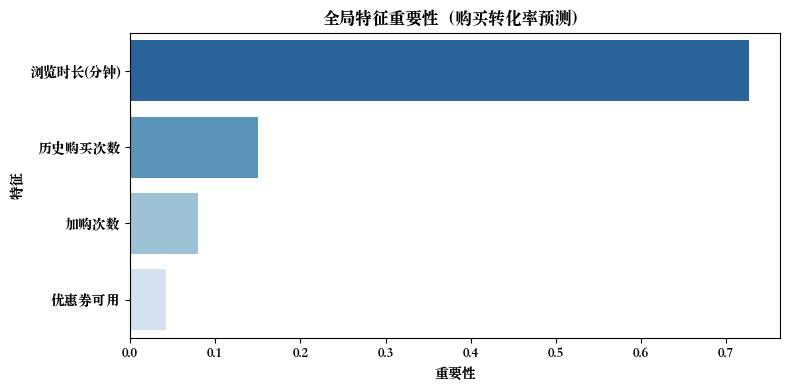

In [3]:
# 1. 导入库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier  # 梯度提升树（工业界常用）
from sklearn.metrics import accuracy_score
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# 2. 生成模拟业务数据（贴近真实电商场景）
np.random.seed(42)
n_samples = 2000  # 2000个用户样本
# macOS 正确的苹方字体名称（二选一）
plt.rcParams['font.sans-serif'] = ['Songti SC']  # 完整名称
# 或用系统通用黑体（更稳定）
# plt.rcParams['font.sans-serif'] = ['Heiti SC']  # 黑体-简

plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 特征定义
data = {
    "浏览时长(分钟)": np.random.exponential(5, n_samples),  # 指数分布（大部分用户浏览短，少部分长）
    "加购次数": np.random.poisson(1, n_samples),  # 泊松分布（加购次数多为0/1/2）
    "优惠券可用": np.random.choice([0, 1], n_samples, p=[0.3, 0.7]),  # 70%用户有优惠券
    "历史购买次数": np.random.poisson(2, n_samples),  # 历史购买次数
    "是否购买": np.zeros(n_samples, dtype=int)  # 目标变量：0=未购买，1=购买
}

df = pd.DataFrame(data)

# 构造购买逻辑（贴近业务：浏览越久、加购越多、有优惠券，购买概率越高）
buy_prob = (
    0.1 * df["浏览时长(分钟)"] + 
    0.2 * df["加购次数"] + 
    0.3 * df["优惠券可用"] + 
    0.15 * df["历史购买次数"]
) / (df[["浏览时长(分钟)", "加购次数", "优惠券可用", "历史购买次数"]].max(axis=1) + 1)
df["是否购买"] = np.random.binomial(1, buy_prob)  # 按概率生成购买标签

# 3. 数据拆分与模型训练
X = df.drop("是否购买", axis=1)
y = df["是否购买"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练梯度提升树模型（调参后，工业界常用配置）
model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
model.fit(X_train, y_train)

# 模型效果验证
y_pred = model.predict(X_test)
print(f"模型测试集准确率: {accuracy_score(y_test, y_pred):.2f}")  # 约80%（符合业务预期）

# 4. 可解释性分析：方法1 → 全局特征重要性（基础）
print("\n===== 全局特征重要性（模型认为哪些特征最关键） =====")
feat_importance = pd.DataFrame({
    "特征": X.columns,
    "重要性": model.feature_importances_
}).sort_values("重要性", ascending=False)
print(feat_importance)

# 可视化全局特征重要性
plt.figure(figsize=(8, 4))
sns.barplot(x="重要性", y="特征", data=feat_importance, palette="Blues_r")
plt.title("全局特征重要性（购买转化率预测）")
plt.tight_layout()
plt.show()


## 四、部署监控阶段：数据漂移检测


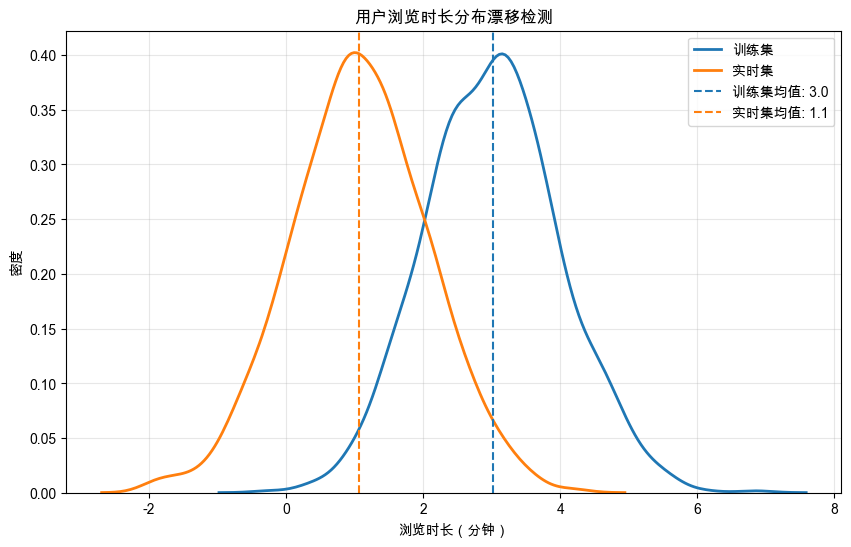

浏览时长PSI值: 0.0914（PSI>0.2表示显著漂移）


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 模拟训练集和实时集的用户浏览时长分布（数据漂移）
np.random.seed(42)
train_data = np.random.normal(3, 1, 1000)  # 训练集：均值3分钟
online_data = np.random.normal(1, 1, 1000) # 实时集：均值1分钟（漂移）

df_drift = pd.DataFrame({
    "训练集浏览时长": train_data,
    "实时集浏览时长": online_data
})

# 绘制分布对比图
plt.figure(figsize=(10, 6))
sns.kdeplot(df_drift["训练集浏览时长"], label="训练集", color="#1f77b4", linewidth=2)
sns.kdeplot(df_drift["实时集浏览时长"], label="实时集", color="#ff7f0e", linewidth=2)
plt.axvline(train_data.mean(), color="#1f77b4", linestyle="--", label=f"训练集均值: {train_data.mean():.1f}")
plt.axvline(online_data.mean(), color="#ff7f0e", linestyle="--", label=f"实时集均值: {online_data.mean():.1f}")
plt.title("用户浏览时长分布漂移检测", fontsize=12)
plt.xlabel("浏览时长（分钟）")
plt.ylabel("密度")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 计算PSI（群体稳定性指标）量化漂移
def calculate_psi(expected, actual, bins=10):
    # 分箱
    expected_bins = np.histogram(expected, bins=bins)[0] / len(expected)
    actual_bins = np.histogram(actual, bins=bins)[0] / len(actual)
    # 避免0值
    expected_bins = np.where(expected_bins == 0, 1e-10, expected_bins)
    actual_bins = np.where(actual_bins == 0, 1e-10, actual_bins)
    # 计算PSI
    psi = np.sum((expected_bins - actual_bins) * np.log(expected_bins / actual_bins))
    return psi

psi_value = calculate_psi(train_data, online_data)
print(f"浏览时长PSI值: {psi_value:.4f}（PSI>0.2表示显著漂移）")

最后给一个参考例子： seaborn 和 matplotlib 的联合操作。 

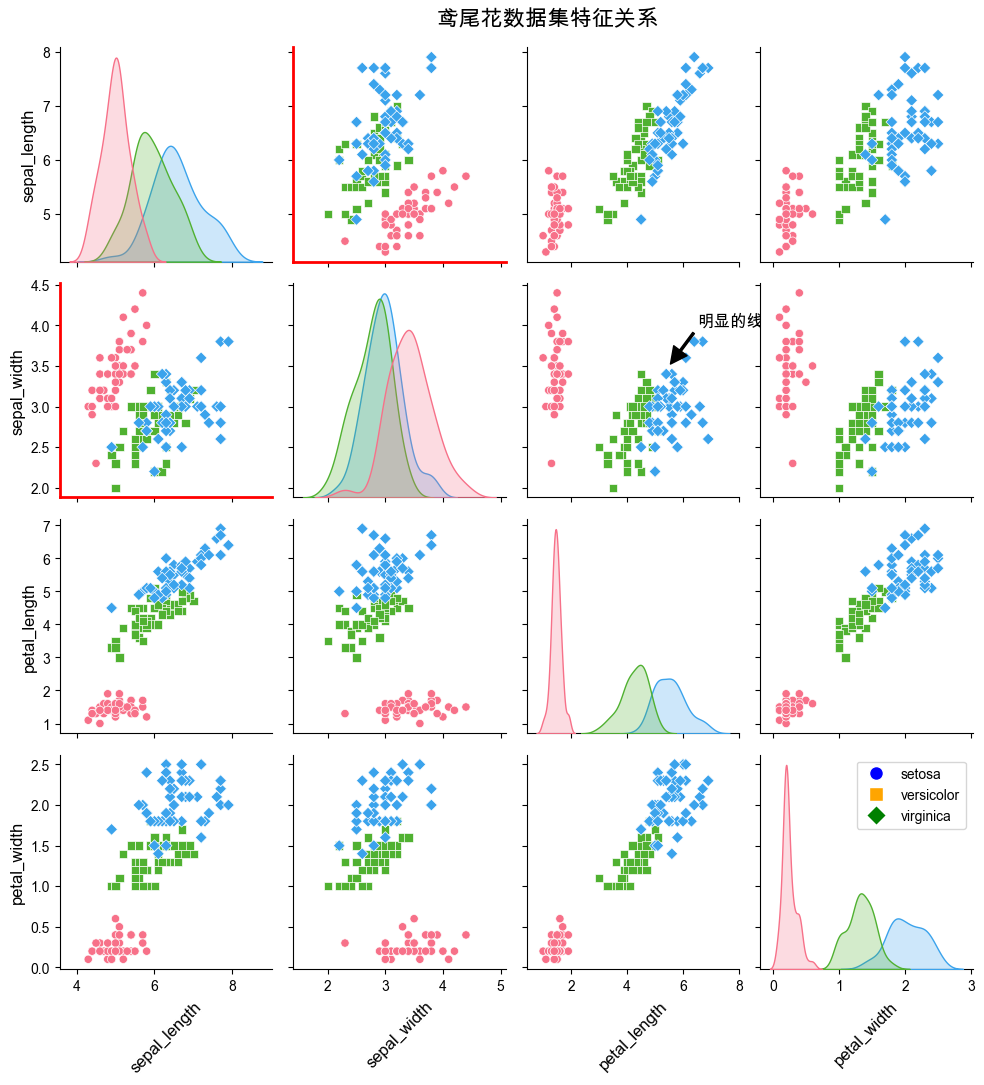

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# 加载数据集
iris = sns.load_dataset("iris")

# 使用 Seaborn 绘制散点图矩阵
g = sns.pairplot(iris, hue="species", palette="husl", markers=["o", "s", "D"])


# 使用 Matplotlib 修改图表
# 1. 设置主标题
plt.suptitle("鸢尾花数据集特征关系", fontsize=16, y=1.02)

# 2. 修改轴标签
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, rotation=45)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)

# 3. 调整子图间距
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# 4. 添加自定义图例
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='setosa', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='s', color='w', label='versicolor', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='D', color='w', label='virginica', markerfacecolor='green', markersize=10)
]
g._legend.remove()  # 移除原图例
plt.legend(handles=legend_elements, loc='upper right')

# 5. 在特定子图添加注释
ax = g.axes[1, 2]  # 第2行第3列的子图
ax.annotate("明显的线性关系", xy=(5.5, 3.5), xytext=(6.5, 4.0),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
            fontsize=12)

# 6. 高亮特定子图
for i, j in [(0, 1), (1, 0)]:
    g.axes[i, j].spines['bottom'].set_color('red')
    g.axes[i, j].spines['top'].set_color('red')
    g.axes[i, j].spines['left'].set_color('red')
    g.axes[i, j].spines['right'].set_color('red')
    g.axes[i, j].spines['bottom'].set_linewidth(2)
    g.axes[i, j].spines['top'].set_linewidth(2)
    g.axes[i, j].spines['left'].set_linewidth(2)
    g.axes[i, j].spines['right'].set_linewidth(2)

# 显示图表
plt.show()